## Problem Statement

When engaging with content in our model world, corporations use recommender system to suggest future content we might like based on the attributes of the content. Be it movies or books that we may be interested in with the goal of keeping customer interested andf However this may cause an echo chamber effect.

An extreme example of an echo chamber caused by recommender system is youtube's algorithm suggesting alt-right content which may lead to an individual developing extremist views. And this a problem of overtraining, because what is recommended is based on the data that is inputed to the system. 

Spotify uses a common method for producing recommendations known as collaborative filtering which generates recommendations based on the combined preferences of the consumer requesting recommendations and those of other consumers. The underlying issue with this method is that song recommendations are based on the 'crowd'.

Furthermore, as the business model of Spotify is built in a way where artists are compensated by number of streams, the homegenization of new music become more prevalent. Such as making songs more catchier and shorter. 

The recommender system I would like to propose is for users to be recommended songs based on the 'DNA' of the music they have been listening to with the goal of potentially exposing the listener to songs form different genres and epochs. This is threfore a cluster or nearest neighbour recommendation system. This would broaden the horizon of music listeners and also bring attention to artists that create music as an artform as opposed to achieving the highest streaming numbers. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')

# Datasets for Artist information (from Spotify Songs Kaggle dataset)

In [2]:
artist_df = pd.read_csv('../data/spotify_songs_1922/artists.csv')
data_by_artist_df = pd.read_csv('../data/spotify_songs_1922/data_by_artist_o.csv')
tracks_df = pd.read_csv('../data/spotify_songs_1922/tracks.csv')
data_df = pd.read_csv('../data/spotify_songs_1922/data_o.csv')
data_by_year_df = pd.read_csv('../data/spotify_songs_1922/data_by_year_o.csv')
data_by_genres_df = pd.read_csv('../data/spotify_songs_1922/data_by_genres_o.csv')

## Decisions Moving Forward
- Using non explicit songs as there are more 
- consider making a decade categorical feature
- clustering genres together as genres are are not generalised


## Modelling:

### Feature Engineering

- using K-means(or other clustering techniques) to cluster genre together 
- should also look into other clustering methods


- what if you use TFIDF on genre feature considering that it is text data (tfidf gives more weight on words that are unique to a datapoint, if the word 'hiphop' is unique to a song's genre name, the model would 'clsuter' them together as it views it as similar. Less weight is given ). Countvectorizer would not be useful, in terms of application it would be better in looing for frequency of phrases etc.
- in TFIDF you are calculating the inverse log freqeuncy of a word in a sentence divided by number sentences, times the the frequency of the word in its sentence. However in this context, sentences are the song genres in a given playlist.
- if a genre is chinese pop, the word pop wouldnt have the most weight to it, but the word 'chinese' would have higher weight. This could potentially be a meta data of its own. 


- find a way for songs to not be suggested based on what's current. let songs that were decades old be be recommended. Decide how to manipulate that weight of the feature.



### Diferent types of Feature Selection/Extraction

- Using SVD (Singular Vector Decompostion) "Matrix Decomposition"
- Using PCA to select the most important variables

### Metrics

- Unsure if the metric is subject to the listener


### Building the Recommender System
- Naive and non personalised way by recreating the Collab Filtering as a baseline
- using distance to build a recommender system via clustered genres
- Using CNN as a recommender system
    - emulating this research paper https://www.sciencedirect.com/science/article/pii/S1877050919310646/pdf?md5=4f9a5242eb223b5c96c9ebf130855467&pid=1-s2.0-S1877050919310646-main.pd
- using cosine similarity

### Potential Limitations and Considerations

- kaggle dataset does not have user engagement and only genre metadata

 - do i need to use the million dataset as i need a rating system to work on?
     - current spotify dataset may not have enough features
     - Source of dataset: http://millionsongdataset.com/
     - This article uses it https://towardsdatascience.com/how-to-build-a-simple-song-recommender-296fcbc8c85
    
     
     
 - Show why Collab filtering is not ideal due to the the cold start problem, also suggesting niche recommendation, requires reference from what may be a scare dataset. Generally why collab filtering would create an echo chamber because popularity of the music can be affected exogenous factors such as hype around the artist, your social group and so on. 
 
 

#### helpful research links

- https://www.nytimes.com/2009/10/18/magazine/18Pandora-t.html
- https://towardsdatascience.com/4-ways-to-supercharge-your-recommendation-system-aeac34678ce9
- https://soundcharts.com/blog/music-industry-trends#the-democratization-of-music-creation

## Data Dictionary

## Datasets Description

#### artist_df
- shows popularity
- shows number of followers
- shows genre

#### data_by_artist_df
- 28680 artists
- gives average of the songs metadeta made by the artist. 
- Think of as the music DNA of the artist
- Also provides a list of genre the artist is categorised in.
 
#### tracks_df (songs)
- 586672 songs
- Does not have genre IMPORTANT
- has repeats of the same song with the same specs, possibly rereleased.
- does not have year or release date
- has song metadata.

#### data_df (songs)
- 170653 songs
- does not have genre
- has release dates and year in the dataset
- has song meta deta

#### data_by_year
- shows average of music data that year
- Useful for EDA
    - show trend of how music has evolved over the years
    - plot graph

## Data Cleaning

## Check for duplicates

In [3]:
# check for Ashnikko result for the Song 'Daisy' in data_df dataset
data_df[(data_df.artists == "['Ashnikko']") & (data_df.name == "Daisy")]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
19638,0.774,2020,0.235,['Ashnikko'],0.834,146523,0.663,1,0AUvWawuP0ibk4SQ3sIZjk,0.0,8,0.372,-6.143,1,Daisy,90,2020-07-09,0.133,121.876


In [4]:
# check for Ashnikko result for the Song 'Daisy' in track_df dataset
tracks_df[(tracks_df.artists == "['Ashnikko']") & (tracks_df.name == "Daisy")]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93137,0AUvWawuP0ibk4SQ3sIZjk,Daisy,82,146523,1,['Ashnikko'],['3PyJHH2wyfQK3WZrk9rpmP'],2020-07-09,0.834,0.663,8,-6.143,1,0.133,0.235,0.0,0.372,0.774,121.876,4
94181,2g1KggY9PKvsoEAOaiz4xx,Daisy,77,146523,1,['Ashnikko'],['3PyJHH2wyfQK3WZrk9rpmP'],2021-01-15,0.834,0.663,8,-6.143,1,0.133,0.235,0.0,0.372,0.774,121.876,4


comments:
tracks_df may have duplicates, one example thus far is difference in release dates. 

Comparing the same song between data_df and tracks_df, they share the same ID for one of them however certain attribute have different values, such as popularity.

In [5]:
# check for Drake result for the Song 'Daisy' in data_df dataset
data_df[(data_df.artists == "['Drake']") & (data_df.name == "Best I Ever Had")]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
17419,0.558,2009,0.1900,['Drake'],0.395,257690,0.922,1,3QLjDkgLh9AOEHlhQtDuhs,0.0,1,0.134,-2.176,1,Best I Ever Had,73,2009,0.375,162.361
17795,0.605,2010,0.0951,['Drake'],0.431,258760,0.894,1,1GxHeBvQ9935Dd3cSfsfBa,0.0,5,0.188,-2.673,0,Best I Ever Had,63,2010-01-01,0.330,162.161


In [6]:
# check for Drake result for the Song 'Daisy' in tracks_df dataset
tracks_df[(tracks_df.artists == "['Drake']") & (tracks_df.name == "Best I Ever Had")]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
82191,3QLjDkgLh9AOEHlhQtDuhs,Best I Ever Had,76,257690,1,['Drake'],['3TVXtAsR1Inumwj472S9r4'],2009,0.395,0.922,1,-2.176,1,0.375,0.1900,0.0,0.134,0.558,162.361,4
83429,1GxHeBvQ9935Dd3cSfsfBa,Best I Ever Had,65,258760,1,['Drake'],['3TVXtAsR1Inumwj472S9r4'],2010-01-01,0.431,0.894,5,-2.673,0,0.330,0.0951,0.0,0.188,0.605,162.161,4
186615,1PWnjvzT5Jhpfnh96DRNDh,Best I Ever Had,51,258800,0,['Drake'],['3TVXtAsR1Inumwj472S9r4'],2009-01-01,0.441,0.904,1,-2.636,1,0.359,0.1020,0.0,0.196,0.529,161.740,4


comments: For the example above, the same song had more than 1 output. For Data_df their release year and date is different as well as some attributes such as 'danceability'. This may indicate that the song was release twice, perhaps the latter was remastered and released in an album and not just as a single like the first time. Tracks_df does not have release date that information. 

data_df seem to not have the song non-explicit version of the song as well. 

Will investigate on more time. With the classic song "Here Comes the Sun" by the Beatles.

In [7]:
# check for Beatles result for the Song 'Here Comes the Sun' in tracks_df dataset
tracks_df[(tracks_df.artists == "['The Beatles']") & (tracks_df.name == "Here Comes The Sun")]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [8]:
# check for Beatles result for the Song 'Here Comes the Sun' in data_df dataset
data_df[(data_df.artists == "['The Beatles']") & (data_df.name == "Here Comes The Sun")]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo


comment: No song to be found, however the remastered version is available.

In [9]:
# check for Beatles result for the Song 'Here Comes the Sun' in tracks_df dataset
tracks_df[(tracks_df.artists == "['The Beatles']") & (tracks_df.name == "Here Comes The Sun - Remastered 2009")]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
42488,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,83,185733,0,['The Beatles'],['3WrFJ7ztbogyGnTHbHJFl2'],1969-09-26,0.557,0.540,9,-10.484,1,0.0347,0.0339,0.00248,0.179,0.394,129.171,4
47141,5bIEpKwEFgJzB7U3gFaeKm,Here Comes The Sun - Remastered 2009,41,187373,0,['The Beatles'],['3WrFJ7ztbogyGnTHbHJFl2'],1973-04-02,0.557,0.519,9,-11.164,1,0.0357,0.0362,0.00126,0.105,0.371,129.157,4


In [10]:
# check for Beatles result for the Song 'Here Comes the Sun' in data_df dataset
data_df[(data_df.artists == "['The Beatles']") & (data_df.name == "Here Comes The Sun - Remastered 2009")]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
9407,0.394,1969,0.0339,['The Beatles'],0.557,185733,0.540,0,6dGnYIeXmHdcikdzNNDMm2,0.00248,9,0.179,-10.484,1,Here Comes The Sun - Remastered 2009,82,1969-09-26,0.0347,129.171
65653,0.371,1973,0.0362,['The Beatles'],0.557,187373,0.519,0,5bIEpKwEFgJzB7U3gFaeKm,0.00126,9,0.105,-11.164,1,Here Comes The Sun - Remastered 2009,40,1973-04-02,0.0357,129.157


Comments: For this song only the remastered version is available on spotify, and they still appear to have different characteristics, such as popularity, duration and energy.

Difference in popularity can be explained by the song being in an alubm that may have not been marketed as well or listeners feel that that album does not have other songs they would enjoy. For example the song that had a lower popularity score belonged to the album 'The Beatles 1967-1970' whereas the song with the higher popularity had belonged to the album 'Abbey Road (remasted)' where its a bigger compliation of classic by the band. 


#### Conclusion

Datasets that would be used for EDA would be data_by_year_df.

Dataset that would be used would be used for modelling would be data_df as it has more information compared to track_df. During comparison, useful information had also reveal itself such as that non exact 'duplicate' of the same song, are rereleased or remastered. This may affect their popularity, but moving forward, I believe that the granualirity of the popularity does not matter and I would threfore bucket them, making this feature categorical. 

In terms of duplicates as one song is the remastered version of the other. By definition, remastering music is essentially improving on the quality of the original copy of a song or album. Removing flaws from the music, providing a cleaner, sharper and more refined listening experience whilst trying to bringing the music up to date with current standard. After remastering, certain attributes of the song would still generally remain the same, such as key, time signature, duration, tempo and speechiness. Nonetheless these duplicates, I would not remove them, as there are some music enthusiast that actually prefered 'non tampered' music.

Also, there are some artist that generally do not make explicit music, and would therefore not have duplicates of the same song where they only differ in explicity. Removing duplciates by only keeping explicit songs would therefore result in removing many artists.


In [11]:
## data

In [12]:
data_df.artists.head()

0    ['Sergei Rachmaninoff', 'James Levine', 'Berli...
1                                       ['Dennis Day']
2    ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...
3                                     ['Frank Parker']
4                                       ['Phil Regan']
Name: artists, dtype: object

In [13]:
data_df.artists[0] #show artist name positioned at index 1

"['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']"

In [14]:
data_df.artists[0][0] #check to see if it is a list

'['

In [15]:
data_df.loc[155464]

valence                                                          0.53
year                                                             2020
acousticness                                                    0.189
artists             ['Louis The Child', 'Quinn XCII', 'Chelsea Cut...
danceability                                                    0.553
duration_ms                                                    197453
energy                                                          0.636
explicit                                                            1
id                                             52681Ivj8kgCi90Lu8B9fl
instrumentalness                                                    0
key                                                                 6
liveness                                                       0.0779
loudness                                                        -4.38
mode                                                                1
name                

As we can see from above, it was a list, 'Sergio Racmaninoff' would have been returned.

artist and genre columns, they are actually not list, but strings that look like list. 
Use regex to solve this problem. 

## Exploratory Data Analysis

In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [17]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [18]:
artist_df.popularity.sort_values(ascending=False)

144481    100
126338     98
313676     98
115489     98
144484     96
         ... 
619749      0
619748      0
619747      0
619746      0
0           0
Name: popularity, Length: 1104349, dtype: int64

In [19]:
artist_df.iloc[144481,:]

id                              1uNFoZAHBGtllmzznpCI3s
followers                                   4.4607e+07
genres        ['canadian pop', 'pop', 'post-teen pop']
name                                     Justin Bieber
popularity                                         100
Name: 144481, dtype: object

comment: Justin Bieber is the most popular artist

In [20]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [21]:
data_df.shape

(170653, 19)

In [22]:
data_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [23]:
tracks_df.shape

(586672, 20)

In [24]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [26]:
for x in data_df.columns:
    if x not in tracks_df.columns:
        print (x)

year


In [27]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

### creating scaled dataframe for eda

In [28]:
lin_graph = data_by_year_df.iloc[:,2:]
ss = StandardScaler()
lin_graph_data = ss.fit_transform(lin_graph)
#lin_graph_data = pd.concat([lin_graph,data_by_year_df.year],axis=1)

In [29]:
lin_graph_data = pd.DataFrame(data = lin_graph_data, columns=data_by_year_df.iloc[:,2:].columns.values)

In [30]:
graph_data = pd.concat([lin_graph_data,data_by_year_df.year],axis=1)

In [31]:
graph_data

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,year
0,1.206593,-2.268729,1.303465,-1.372612,1.241416,-0.141117,-1.643865,-0.394037,-2.567559,-2.656372,-1.297256,-0.504959,1921
1,1.395278,-1.050819,-2.424439,-1.335327,1.974278,1.824215,-2.364442,0.132090,-2.682246,0.059618,-1.322135,1.751841,1922
2,1.463369,0.778558,-1.935347,-1.182517,1.461764,1.079979,-0.699070,-0.145779,-0.355409,1.623313,-1.067354,-1.069159,1923
3,1.401148,0.251686,-1.421483,-0.673342,3.184595,1.515427,-0.732122,-0.168531,0.828525,2.288008,-1.296883,1.751841,1924
4,1.482933,0.711808,-1.659106,-1.081931,1.843836,1.652901,-0.704637,0.074121,-0.087526,1.561357,-1.202546,0.341341,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.993316,1.217422,-0.231368,0.870891,-0.817217,-1.518719,1.264707,-0.018941,0.467444,-1.748761,1.566603,-1.069159,2016
96,-0.986279,1.448058,-0.634512,0.855765,-0.791730,-0.926886,1.183293,0.057215,0.210427,-2.010511,1.742160,-0.787059,2017
97,-1.053679,2.432513,-0.835076,0.930417,-1.143516,-1.790666,1.553464,0.260836,1.047048,-1.463828,1.743747,-0.787059,2018
98,-1.014750,2.073803,-1.030209,0.873183,-0.951324,-1.998883,1.374370,0.185793,0.748059,-1.274391,1.838910,-0.787059,2019


<AxesSubplot:xlabel='year'>

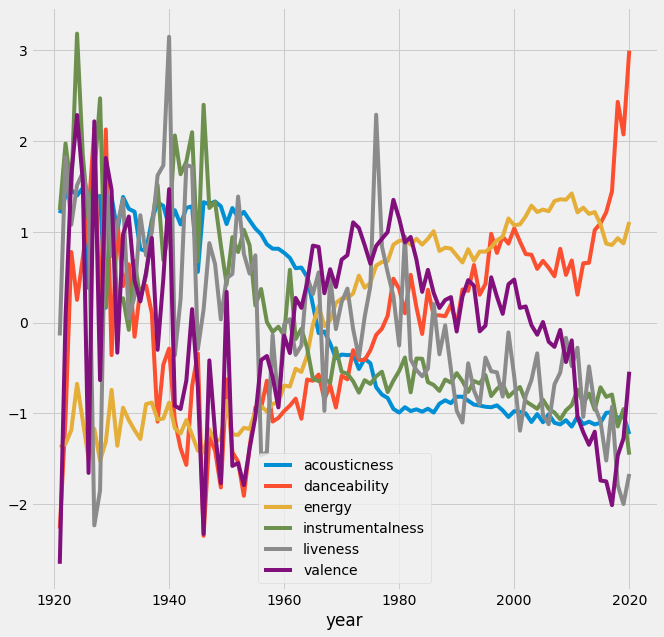

In [32]:
graph_data[["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence","year"]].set_index('year').plot(kind='line',figsize=(10,10))

comments: General EDA, not very useful in producing meaningful insight. Moving forward, I will explore more trends related to the problem satement

## More Ideas for EDA

- show how duration of music has shorten over time
- show relation to popular music and short duration, indicative of our shortened attention span
- show how prevalence of genre has affected our music taste
- show how genre populartiy has changed

### show how duration of music has shorten over time

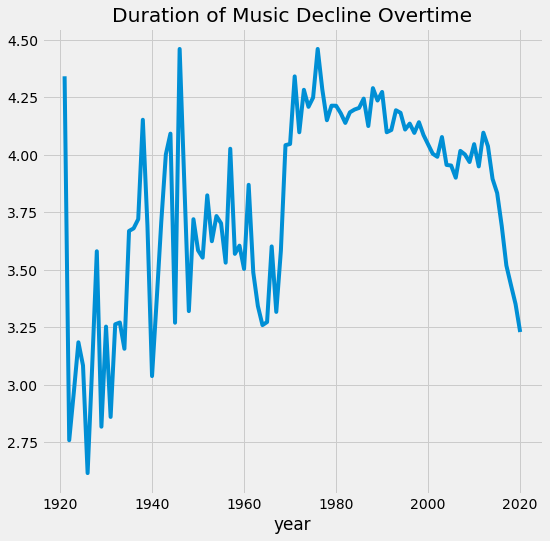

In [34]:
#plot the duration of songs in minute across time
plt.figure(figsize=(8,8))
(data_by_year_df.groupby('year')['duration_ms'].mean()/60000).plot() #group data by year, take the average duration per year and plot
plt.title('Duration of Music Decline Overtime')
plt.savefig('../images/duration-of-music-decline-overtime.png');

In [35]:
(data_by_year_df.groupby('year')['duration_ms'].mean()/60000)

year
1921    4.342286
1922    2.757829
1923    2.965706
1924    3.184112
1925    3.083115
          ...   
2016    3.689942
2017    3.518595
2018    3.433350
2019    3.350413
2020    3.228807
Name: duration_ms, Length: 100, dtype: float64

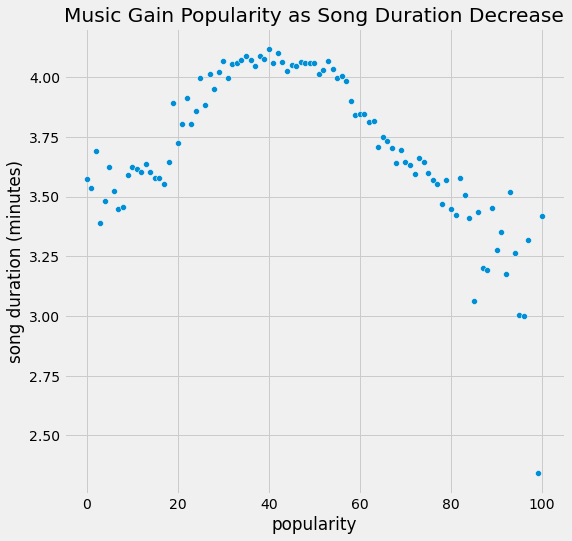

In [95]:
#plot the duration of songs relationship with popularity
plt.figure(figsize=(8,8))
sns.scatterplot(data =(data_df.groupby('popularity')['duration_ms'].mean()/60000))
plt.title('Music Gain Popularity as Song Duration Decrease')
plt.ylabel('song duration (minutes)')
plt.savefig('../images/more-popular-as-song-duration-decrease');

shorter duration in songs shows that artist or incentivised to make shorter songs for more plays as they are paid per stream. Can also reflect music listener's shortened attentions span. 

Furthermore songs tend to be more popular, past the 50 mark, with shorter duration. 

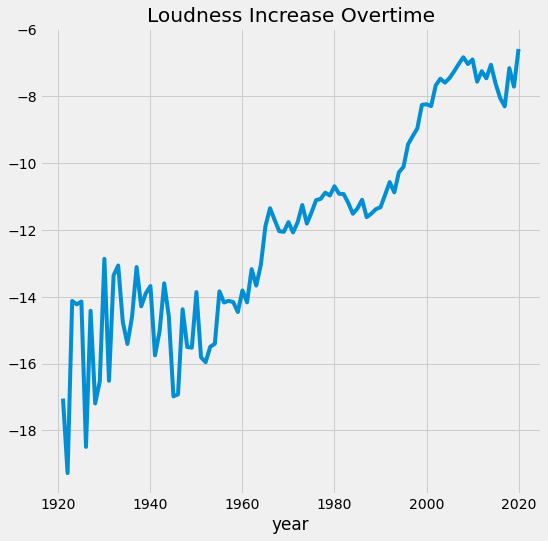

In [41]:
plt.figure(figsize=(8,8))
data_by_year_df.groupby('year')['loudness'].mean().plot() #group data by year, take the average duration per year and plot
plt.title('Loudness Increase Overtime')
plt.savefig('../images/loudness-increase-overtime');


-  Loudness, the inherent volume of the music itself, before any adjustments by the listener.
- dynamic range becomes much more restricted. As in, the contrast between the really soft stuff, and the really loud stuff shrinks, so the overall emotional impact of the music is reduced.

In [42]:
data_by_year_df.key.unique()

array([ 2, 10,  0,  5,  9,  7,  1])

In [43]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [44]:
#convert key data into string 
data_df.key = data_df.key.apply(lambda x: str(x))

In [45]:
data_df.groupby('year')['key'].unique()

year
1921    [10, 7, 3, 5, 2, 0, 1, 8, 9, 4, 11, 6]
1922    [0, 1, 7, 4, 6, 2, 5, 8, 10, 11, 9, 3]
1923    [8, 4, 3, 0, 5, 10, 2, 7, 9, 1, 11, 6]
1924    [2, 3, 8, 0, 10, 7, 5, 11, 9, 1, 6, 4]
1925    [3, 8, 5, 9, 0, 2, 7, 10, 11, 6, 1, 4]
                         ...                  
2016    [6, 8, 0, 10, 1, 5, 7, 9, 4, 3, 11, 2]
2017    [0, 8, 7, 11, 9, 6, 10, 5, 1, 4, 3, 2]
2018    [0, 6, 3, 4, 7, 11, 8, 2, 1, 10, 5, 9]
2019    [0, 2, 10, 8, 1, 7, 5, 4, 6, 11, 3, 9]
2020    [7, 6, 1, 0, 4, 10, 9, 5, 11, 8, 2, 3]
Name: key, Length: 100, dtype: object

In [46]:
#show value count of keys in proportion to overall count for spread of data
data_df[data_df['year'] == 2020]['key'].value_counts(normalize =True)

1     0.138424
0     0.104926
7     0.101970
11    0.099507
5     0.092611
2     0.082266
6     0.081281
10    0.073399
8     0.072414
9     0.069458
4     0.062562
3     0.021182
Name: key, dtype: float64

In [47]:
sample = data_df[data_df['year'] == 2020]['key'].value_counts(normalize =True)

In [48]:
len(sample)

12

In [49]:
#calculate the variance to return a single value
((sample - sample.mean())**2).sum()/(len(sample)-1)

0.0008096569078393436

In [50]:
#test for a different year
sample2 = data_df[data_df['year'] == 2005]['key'].value_counts(normalize =True)

In [51]:
((sample2 - sample2.mean())**2).sum()/(len(sample2)-1)

0.0006358257127487898

In [52]:
#list of variance per year
variance = []

for year in data_df.year.unique():
    #create normalized value count
    normal_data = data_df[data_df['year'] == year]['key'].value_counts(normalize =True)
    # calculate variance
    variance_val = ((normal_data - normal_data.mean())**2).sum()/(len(normal_data)-1)
    #append cariance to list
    variance.append(variance_val)
        

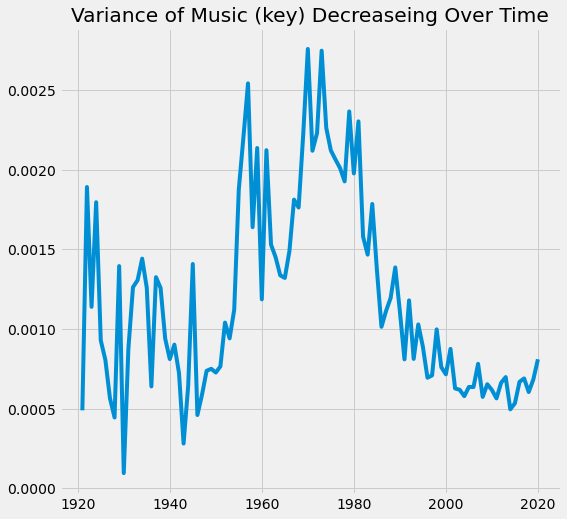

In [54]:
plt.figure(figsize=(8,8))
plt.title('Variance of Music (key) Decreaseing Over Time')
sns.lineplot(y=variance, x=data_df.year.unique())
plt.savefig('../images/variance-of-music-decreasing-over-time');

Key or pitch includ details about harmony, melody, chords, and progressions – essentially how the notes were arranged and unfolded over the course of the song.

Data suggested that the variety of pitch progressions used has shrunk over the years. In other words, musicians are becoming less inventive and adventurous in how they get from one note or chord to the next, and instead seem to be relying more and more on the same sequences and patterns that others have used successfully in the past.

### summary of EDA thus far

#### music becoming more cookie cutter

-  pitch
    - the data suggested that the variety of pitch progressions used has shrunk over the years
    

- music getting louder 
    - everything is getting louder. Which might not seem like a big deal (just turn down the volume knob, right?), until you start to notice that when everything is louder, the dynamic range becomes much more restricted. As in, the contrast between the really soft stuff, and the really loud stuff shrinks, so the overall emotional impact of the music is reduced. 

### show the most popular month that music is released

In [55]:
data_df['month'] = pd.DatetimeIndex(data_df['release_date']).month

In [56]:
data_df.release_date.head(1000)

0            1921
1            1921
2            1921
3            1921
4            1921
          ...    
995          1926
996    1926-07-12
997          1926
998          1926
999          1926
Name: release_date, Length: 1000, dtype: object

In [57]:
len(data_df.loc[999]['release_date'])

4

In [58]:
len(data_df.loc[996]['release_date'])


10

In [59]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  object 
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [60]:
data_df['month'] = None

In [61]:

for row in range(len(data_df)):
    if len(data_df.iat[row,16]) == 4:
        data_df.iat[row,19] = np.nan
    elif len(data_df.iat[row,16]) == 7:
        date = data_df.iat[row,16]
        date = datetime.datetime.strptime(date, "%Y-%m")
        data_df.iat[row,19] = date.month
    else:
        date = data_df.iat[row,16]
        date = datetime.datetime.strptime(date, "%Y-%m-%d")
        data_df.iat[row,19] = date.month


In [62]:
data_df.month.value_counts()

1     38363
11    10047
12     9652
10     9089
9      8318
6      7545
5      6765
3      6651
8      6460
7      6106
4      5851
2      4951
Name: month, dtype: int64

In [63]:
data_df.month.value_counts()

1     38363
11    10047
12     9652
10     9089
9      8318
6      7545
5      6765
3      6651
8      6460
7      6106
4      5851
2      4951
Name: month, dtype: int64

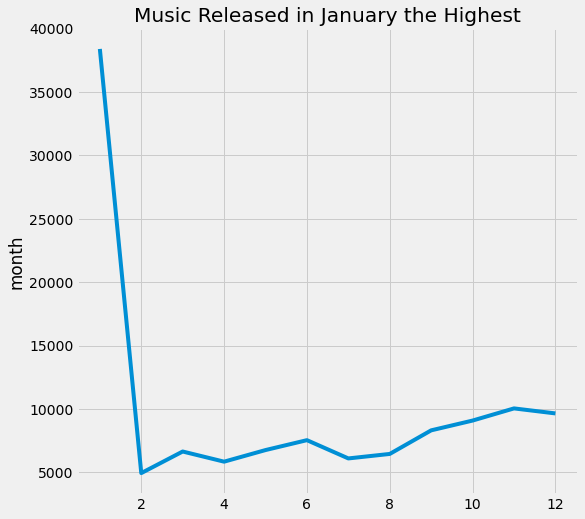

In [84]:
plt.figure(figsize=(8,8))
sns.lineplot(data=data_df.month.value_counts())
plt.title('Music Released in January the Highest')
plt.savefig('../images/music-released-in-january-the-highest');

Generally, the first two months of the year are a great time to release new music. Why? The market isn't as saturated as later on in the year, and the minds of listeners are open to new things.

## Clustering Genres Together

In this section, data_by_genres_df is used for clustering to see how the different genres would be clustered together based on their average song attributes, using differnt clustering methods. 

By using this dataset, we can see the different kinds of genre you could expect from a given cluster.

In [65]:
data_by_genres_df.sort_values(by='popularity',ascending=False).head(20)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.818000,169799.166667,0.630167,2.000000e-05,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2778,0,turkish edm,0.008290,0.698000,186700.000000,0.719000,4.010000e-06,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
2533,1,south african house,0.043833,0.847000,311854.333333,0.562333,1.303392e-01,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.877000,231848.000000,0.777000,3.460000e-05,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
46,0,alberta hip hop,0.330000,0.885000,144000.000000,0.685000,0.000000e+00,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11
536,0,chinese electropop,0.002570,0.660000,217088.000000,0.787000,0.000000e+00,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1
37,0,afroswing,0.318450,0.711750,179995.375000,0.580187,2.578950e-04,0.189950,-7.016687,0.195563,83.250125,0.676625,77.312500,11
31,0,afro soul,0.006270,0.766000,202627.000000,0.873000,0.000000e+00,0.076400,-6.381000,0.143000,126.988000,0.743000,77.000000,11
2383,1,russian dance,0.005610,0.653000,198095.000000,0.945000,9.150000e-01,0.439000,-2.634000,0.096000,126.093000,0.326000,77.000000,5
1239,1,guaracha,0.009030,0.745000,189818.000000,0.972000,4.650000e-01,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7


In [66]:
data_by_genres_df["genres"].nunique()

2973

In [67]:
data_by_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [68]:
data_by_genres_df.select_dtypes(np.number).head()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


### Finding optimal K using elbow method

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible

In [69]:
ss = StandardScaler()

# assign numerical data as train data
X = data_by_genres_df.select_dtypes(np.number)
X_scaled = ss.fit_transform(X)

In [70]:

K = range(1,10)
distortion = [] #the sum of square error for each data point to their nearest cluster centre
# using for loop
for k in K:
    inertia = KMeans(n_clusters=k).fit(X_scaled).inertia_
    distortion.append(inertia)



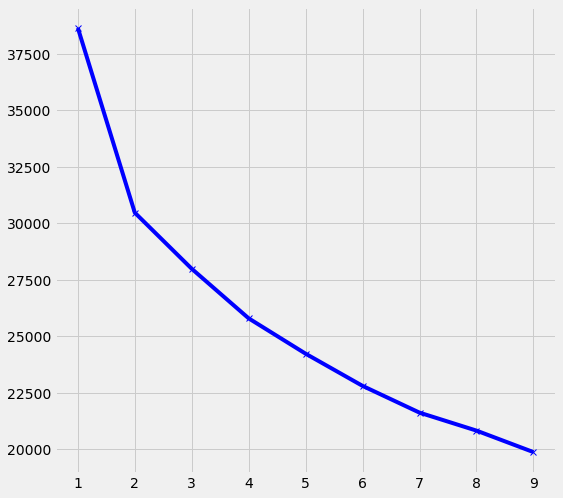

In [96]:
#plot for distortion against k range 50 to select best K
plt.figure(figsize = (8,8))
plt.plot(K, distortion,'bx-')
plt.savefig('../images/elbow-method');

In [74]:
KMeans(n_clusters=20).fit(X_scaled).inertia_


15339.191508938047

wont be using the elbow method as 2 clusters for genre of music is not logical, will give my own K value or look into other clustering methods that makes more sense for just eyeballing it.

In [75]:
#reasign kmean's prediction
km_model = KMeans(n_clusters=30).fit(X_scaled)
grouped_genre = km_model.predict(X_scaled)

In [76]:
data_by_genres_df['grouped_genre'] = grouped_genre

In [77]:
data_by_genres_df.grouped_genre.value_counts()

5     263
10    246
1     228
18    196
27    187
14    144
19    131
13    128
3     128
4     120
8     119
9     117
22    108
2     100
0      98
29     96
6      95
16     87
15     85
17     65
24     50
12     50
28     41
20     31
26     22
21     13
23     11
7       8
11      5
25      1
Name: grouped_genre, dtype: int64

In [78]:
data_by_genres_df[(data_by_genres_df.grouped_genre == 4)].head(30)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,grouped_genre
93,1,anime score,0.300139,0.473544,223791.409820,0.647055,0.300843,0.166846,-8.463057,0.073648,123.066583,0.374913,50.539803,5,4
120,1,arkansas indie,0.236500,0.430000,265170.500000,0.504000,0.107665,0.171000,-10.193500,0.031250,100.529000,0.168500,50.000000,3,4
126,1,asbury park indie,0.000969,0.557000,226853.000000,0.815000,0.001880,0.093200,-5.402000,0.032800,88.929000,0.445000,50.000000,0,4
127,1,asheville indie,0.600667,0.548000,257521.666667,0.517000,0.312333,0.121667,-7.792333,0.034200,106.587667,0.539333,47.000000,0,4
155,1,australian country,0.339248,0.594223,204273.631579,0.543227,0.000021,0.125475,-9.926076,0.050019,108.122674,0.535173,43.418947,2,4
162,1,australian indie folk,0.334759,0.526375,275284.745370,0.545167,0.042584,0.159930,-9.823431,0.103252,118.432032,0.385680,56.388889,5,4
167,1,australian pop,0.232096,0.590632,241329.883990,0.649049,0.027319,0.166159,-7.039690,0.059337,121.535204,0.488809,57.526460,0,4
171,1,australian r&b,0.518750,0.617500,277272.000000,0.416500,0.000032,0.104450,-8.246000,0.107125,102.273000,0.277000,62.250000,2,4
357,1,brisbane indie,0.123000,0.607500,229646.000000,0.588500,0.000010,0.106200,-7.863500,0.032450,142.971500,0.345000,60.500000,0,4
372,1,british folk,0.627307,0.507357,236720.841328,0.333057,0.090056,0.137406,-13.056687,0.043333,122.859926,0.488773,33.716807,0,4


In [79]:
data_by_genres_df[(data_by_genres_df.genres == 'aggrotech')]

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,grouped_genre
38,1,aggrotech,0.011868,0.601333,236315.0,0.712333,0.252,0.259667,-6.408,0.034233,116.721333,0.443333,55.666667,1,14


In [80]:
def scaler(data):
    ss = StandardScaler()
    return ss.fit_transform(data)

## Visualise Clustering Segmentation

What is tsne? 

Use to understand high-dimensional data and project it into low-dimensional space (2D).

Can be used in CNN.

In [81]:
# initialise TSNE
tsne = TSNE(n_components=2) #reduce to two dimensions
genre_embedding = tsne.fit_transform(X_scaled)
projection = pd.DataFrame(columns=['x','y'], data= genre_embedding) #put array into dataframe
projection['genre'] = data_by_genres_df['genres'] #assign data points original genres
projection['grouped_genre'] = data_by_genres_df['grouped_genre'] #assign data points cluster

In [89]:
def tsne_plot(data,title):
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.scatter(x='x', y='y', data=data, c ='grouped_genre', cmap='tab20')

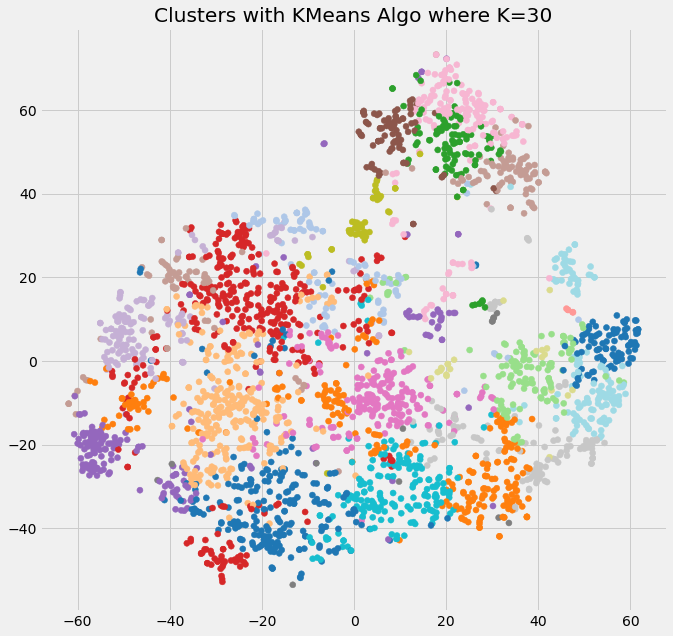

In [94]:
tsne_plot(projection,'Clusters with KMeans Algo where K=30')
plt.savefig('../images/k-mean30');

Visually, the segementation of the data does not appear to be the best. May have to reconsider the clustering algorithm or the number of cluster. 

# Using Spotify API

## What ive learnt using the API



## Feature Selection


## Building Recommender

### Content-based filtering 

#### Advantages

The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier to scale to a large number of users.
The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.

#### Disadvantages

Since the feature representation of the items are hand-engineered to some extent, this technique requires a lot of domain knowledge. Therefore, the model can only be as good as the hand-engineered features.
The model can only make recommendations based on existing interests of the user. In other words, the model has limited ability to expand on the users' existing interests.

## Recommendations

Implicit
- or get implicit feedback on the number times a user skips recommended suggestion (not the most accurate as clicks can happen by accident)
- what is the ratio of songs added to the playlist against suggested
- the duration of the song you listen to
- how often the song is repeated provided its added into the playlist


Explicit
- have the user for explicit feedback whether they like the recommendation (perceived quality)